In [2]:
#!pip install pandas
import pandas as pd

In [4]:
import pandas as pd

# Define the path to the CSV file
file_path = "agMIP RIA Phase 2 - CIWARA - Navrongo - Maize/acmo.csv"

# Use the read_csv() function to read the file and store the data in a DataFrame
df = pd.read_csv(file_path)

# Print the first 5 rows of the DataFrame
print(df.head())


   ! ID for suite of sites or experiments  \
0  !                                 text   
1  #                             SUITE_ID   
2  *                                  NaN   
3  *                                  NaN   
4  *                                  NaN   

  Name of experiment, field test or survey Field Overlay (DOME) ID  \
0                                     text                    text   
1                                   EXNAME           FIELD_OVERLAY   
2                                  AN001_1   NAVRONGO----0--FIELD2   
3                                  AN004_1   NAVRONGO----0--FIELD3   
4                                  AN005_1   NAVRONGO----0--FIELD2   

  Seaonal Strategy (DOME) ID Rotational Analysis (DOME) ID BATCH (DOME) ID  \
0                       text                          text            text   
1          SEASONAL_STRATEGY           ROTATIONAL_ANALYSIS      BATCH_DOME   
2                        NaN                           NaN             NaN

/var/folders/r5/x0f4tdrx40s9xs060kqd7t440000gn/T/ipykernel_36175/3461085397.py:7: DtypeWarning: Columns (1,5,6,7,8,9,11,12,15,16,17,19,22,23,29,30,31,32,33,34,35,36,37,38,39,40,41,47,48,49,51,52,53,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [19]:
df_locations = df.loc[:,["Site Latitude","Site Longitude"]]

In [20]:
df_locations.shape

(61780, 2)

In [21]:
df_locations.to_csv("locations.csv", index=False)

In [24]:
!pip3 install rasterio


  Using cached rasterio-1.3.4.tar.gz (406 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [39]:
import rasterio as rs

In [133]:
dataset = rs.open("/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time series image.tif")

In [41]:
print(dataset.count)

120


In [42]:
print(dataset.height,dataset.width)

1262 1394


In [43]:
print(dataset.crs)

EPSG:32643


In [198]:
import glob
import xarray as xr
#path = '/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/*.tif'
geotiff_da = xr.open_rasterio('/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time-series-image-2.tif', concat_dim='time', combine='nested', engine='scipy')
from dea_tools.datahandling import paths_to_datetimeindex
from dea_tools.plotting import rgb

/var/folders/r5/x0f4tdrx40s9xs060kqd7t440000gn/T/ipykernel_36175/2488831945.py:4: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  geotiff_da = xr.open_rasterio('/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time-series-image-2.tif', concat_dim='time', combine='nested', engine='scipy')


In [65]:
geotiff_da.is_tiled

1

In [199]:
#geotiff_da.sel(band=1).plot(x='longitude', y='latitude', col='time', col_wrap=4, cmap='jet')
print(geotiff_da)

<xarray.DataArray (band: 120, y: 1262, x: 1394)>
[211107360 values with dtype=float32]
Coordinates:
  * band     (band) int64 1 2 3 4 5 6 7 8 9 ... 113 114 115 116 117 118 119 120
  * y        (y) float64 3.81e+06 3.81e+06 3.81e+06 ... 3.798e+06 3.798e+06
  * x        (x) float64 -1.128e+07 -1.128e+07 ... -1.127e+07 -1.127e+07
Attributes:
    transform:      (10.0, 0.0, -11282920.0, 0.0, -10.0, 3810350.0)
    crs:            +init=epsg:32643
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NDVI', 'EVI', 'SAVI', 'NDWI', 'NDVI_1', 'EVI_1', 'SAVI_...
    AREA_OR_POINT:  Area


In [140]:
# Import libraries
import os
import glob
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt
import numpy as np

In [97]:
NDVIFiles = glob.glob(path)
NDVIFiles

['/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time series image.tif']

In [124]:
NDVI = gdal.Open(NDVIFiles[0])                    # Read file in, starting with MOD13Q1 version 6
NDVIBand = NDVI.GetRasterBand(1)                  # Read the band (layer)
NDVIData = NDVIBand.ReadAsArray().astype('float') # Import band as an array with type float

In [125]:
print(NDVI)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x283a28d80> >


In [209]:
from rasterio.plot import show
patha = '/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time-series-image-2.tif'

#ds_time_stack = xr.open_rasterio(patha, chunks={'x':'auto', 'y':'auto','band':'auto'},engine=scipy)
print(patha)

/Users/aaronl/Documents/GitHub/cracow-poland-rural-farmers/reports/AgMIP RIA Phase 2 - CIWARA - Navrongo - Maize/time-series-image-2.tif


In [171]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

from skimage.io import imread
from skimage import exposure
from skimage.filters import try_all_threshold
from skimage.filters import threshold_otsu, threshold_local
from skimage import measure
from skimage import feature

<xarray.DataArray (band: 120, y: 1262, x: 1394)>
[211107360 values with dtype=float32]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 114 115 116 117 118 119 120
  * x            (x) float64 -1.128e+07 -1.128e+07 ... -1.127e+07 -1.127e+07
  * y            (y) float64 3.81e+06 3.81e+06 3.81e+06 ... 3.798e+06 3.798e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('NDVI', 'EVI', 'SAVI', 'NDWI', 'NDVI_1', 'EVI_1', 'SAVI_...


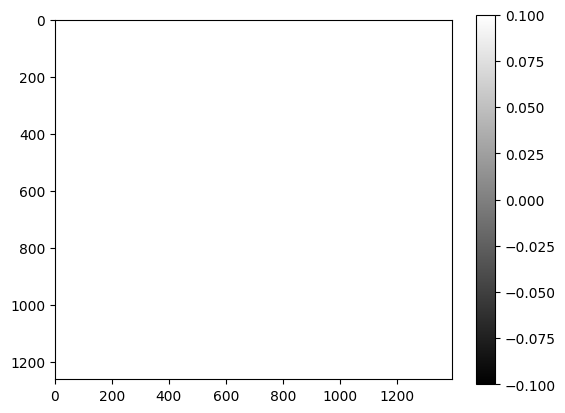

In [212]:
import matplotlib.pyplot as plt
import rioxarray
da = rioxarray.open_rasterio(patha, masked=True)
# Open the file using rasterio
print(da)
# Create a plot
plt.imshow(da[0,:,:], cmap='gray')
plt.colorbar()
plt.show()

In [196]:
print(data)


[array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32), array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan,